In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
#df_women_final = pd.read_csv('df_women_final.csv')
df_men_final = pd.read_csv('df_men_final.csv')

In [3]:
df_men_final.loc[(df_men_final.target_group < 1)].head()

,Name,Age_final,Month_BirthDay,Quarter_REA,Half_REA,Cadet_Win,Cadet_Success,Cadet_Part,Junior_Win,Junior_Success,Junior_Part,Senior_Win_CC,Senior_Success_CC,Senior_Part_CC,Senior_Win_WC,Senior_Success_WC,Senior_Part_WC,target_rank,target_group,target_medalist
5,"Akgul, Taha",27,11,4,1,0,0,0,0,1,2,4,4,5,2,3,3,2.0,0.0,0
6,"Alborov, Aslanbek",26,4,2,0,0,1,1,1,4,5,0,0,0,0,0,0,3.0,0.0,0
8,"Aliev, Haji",26,4,2,0,0,1,1,0,1,1,1,3,5,2,2,3,1.0,0.0,0
23,"Berianidze, Levan",27,10,4,1,0,0,0,0,2,2,0,0,1,1,2,3,3.0,0.0,0
28,"Bonne Rodriguez, Yowlys",34,11,4,1,0,0,0,2,2,3,3,5,5,0,1,2,3.0,0.0,0


In [4]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [5]:
# create features (X) and target (y)
X = df_men_final.drop(columns = ['Name', 'target_rank', 'target_group', 'target_medalist']).values
y = df_men_final['target_group'].values

In [6]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [7]:
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (661, 16) (661,)
Testing set:  (357, 16) (357,)


In [10]:
### GaussianNB
from sklearn.naive_bayes import GaussianNB

In [11]:
model_gnb = GaussianNB()

In [12]:
%%time
# model
model_gnb = GaussianNB()

params = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}
cv_gnb = GridSearchCV(cv=5, estimator=model_gnb, param_grid = params, scoring='accuracy')

cv_gnb.fit(X_train, y_train)
best_gnb = cv_gnb.best_estimator_   

Wall time: 168 ms


In [13]:
best_gnb

GaussianNB(var_smoothing=0.0001)

In [14]:
%%time
gnb_train = metrics.accuracy_score(y_train, best_gnb.predict(X_train))
gnb_test = metrics.accuracy_score(y_test, best_gnb.predict(X_test))
print('Train set Accuracy: ', gnb_train)
print('Test set Accuracy: ', gnb_test)

Train set Accuracy:  0.6717095310136157
Test set Accuracy:  0.6498599439775911
Wall time: 8.04 ms


In [15]:
# SVM for Multiclass Classification
from sklearn.svm import SVC

In [16]:
%%time
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=5)

svm_model.fit(X_train, y_train)

Wall time: 1min 34s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [17]:
best_svm = svm_model.best_estimator_
best_svm

SVC(C=1000, gamma=0.001)

In [18]:
%%time
svm_train = metrics.accuracy_score(y_train, best_svm.predict(X_train))
svm_test = metrics.accuracy_score(y_test, best_svm.predict(X_test))
print('Train set Accuracy: ', svm_train)
print('Test set Accuracy: ', svm_test)

Train set Accuracy:  0.7382753403933434
Test set Accuracy:  0.6526610644257703
Wall time: 87.9 ms


In [19]:
data = {'y_Actual':    y_test,
        'y_Predicted': best_svm.predict(X_test)}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  0.0  1.0  2.0
Actual                  
0.0         13    3   38
1.0          5    1   65
2.0         10    3  219


In [20]:
### RANDOM FOREST

In [21]:
%%time

# model
rfc=RandomForestClassifier(random_state=42)

# parameters for GridSearch
    
param_grid = { 
        'criterion': ['entropy'],
        'n_estimators': [50,60,70],
        'max_depth': [3,5,7],
        'min_samples_leaf': range(3,5)
}
    
cv_rfc = GridSearchCV(cv=5, estimator=rfc, param_grid=param_grid, scoring='accuracy')
cv_rfc.fit(X_train, y_train)
best_rfc = cv_rfc.best_estimator_    

Wall time: 11.7 s


In [22]:
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       n_estimators=60, random_state=42)

In [23]:
rfc_train  = metrics.accuracy_score(y_train, best_rfc.predict(X_train))
rfc_test = metrics.accuracy_score(y_test, best_rfc.predict(X_test))
print('Train set Accuracy: ', rfc_train)
print('Test set Accuracy: ', rfc_test)

Train set Accuracy:  0.7307110438729199
Test set Accuracy:  0.6638655462184874


In [24]:
### XGBOOST

In [25]:
%%time

xgb_model = XGBClassifier(objective = 'multi:softprob', eval_metric='mlogloss', num_class = 3, use_label_encoder=False)
    # parameters for GridSearch
param_grid = { 
        'n_estimators': [50, 60],
        'max_depth': [3, 4],
        'learning_rate' :[0.1, 0.2, 0.3],
        'alpha' : [1, 10, 20, 50]
    }
    
cv_xgb = GridSearchCV(cv=5, estimator=xgb_model, param_grid=param_grid)
cv_xgb.fit(X_train, y_train)
best_xgb = cv_xgb.best_estimator_

Wall time: 25.4 s


In [26]:
best_xgb

XGBClassifier(alpha=20, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8, num_class=3,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=20, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [27]:
%%time
xgb_train  = metrics.accuracy_score(y_train, best_xgb.predict(X_train))
xgb_test = metrics.accuracy_score(y_test, best_xgb.predict(X_test))

print('Train set Accuracy: ', xgb_train)
print('Test set Accuracy: ', xgb_test)

Train set Accuracy:  0.7110438729198184
Test set Accuracy:  0.6694677871148459
Wall time: 7.99 ms


In [28]:
data = {'y_Actual':    y_test,
        'y_Predicted': best_xgb.predict(X_test)}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0  1    2
Actual               
0.0        16  1   37
1.0         7  0   64
2.0         7  2  223


In [29]:
### LightGBM
from lightgbm import LGBMClassifier

In [30]:
%%time

lgbm_model = LGBMClassifier(objective = 'multiclass', num_class = 3, boosting_type ='gbdt', random_state=42)

# parameters for GridSearch
param_grid = { 
        'n_estimators': [80, 85, 90],
        'max_depth': [2,3,4],
        'learning_rate' :[0.1, 0.2, 0.3],
        'reg_alpha' : [0.2, 0.3, 0.4],
         }
    
cv_lgbm = GridSearchCV(cv=5, estimator=lgbm_model, param_grid=param_grid)
cv_lgbm.fit(X, y)
best_lgbm = cv_lgbm.best_estimator_

Wall time: 36.5 s


In [31]:
best_lgbm

LGBMClassifier(max_depth=2, n_estimators=80, num_class=3,
               objective='multiclass', random_state=42, reg_alpha=0.3)

In [32]:
%%time
lgbm_train  = metrics.accuracy_score(y_train, best_xgb.predict(X_train))
lgbm_test = metrics.accuracy_score(y_test, best_lgbm.predict(X_test))

print('Train set Accuracy: ', lgbm_train)
print('Test set Accuracy: ', lgbm_test)

Train set Accuracy:  0.7110438729198184
Test set Accuracy:  0.711484593837535
Wall time: 7.99 ms


In [ ]:
# create table with models results

In [33]:
data_accuracy = {'ML_algorithms':['GaussianNB', 'SVM', 'Random Forest', 'XGBoost', 'LightGBM'],
        'Train set Accuracy':  [gnb_train, svm_train, rfc_train, xgb_train, lgbm_train],
        'Test set Accuracy': [gnb_test, svm_test, rfc_test, xgb_test, lgbm_test],
        }

df_result_accuracy = pd.DataFrame (data_accuracy, 
                          columns = ['ML_algorithms','Train set Accuracy', 'Test set Accuracy'])

In [35]:
df_result_accuracy

,ML_algorithms,Train set Accuracy,Test set Accuracy
0,GaussianNB,0.671710,0.649860
1,SVM,0.738275,0.652661
2,Random Forest,0.730711,0.663866
3,XGBoost,0.711044,0.669468
4,LightGBM,0.711044,0.711485


In [36]:
# The best model is LightGBM

# the most important predictions of medalist (class - 0)
# Because of this I compare confusion matrixs and calculate predictions for medalist

In [37]:
# Compare confusion matrix for next models
# The confusion matrix for XGBOOST and LightGBM

In [38]:
# The confusion matrix for XGBOOST
data = {'y_Actual':    y_test,
        'y_Predicted': best_xgb.predict(X_test)}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix_xgb = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix_xgb)

Predicted   0  1    2
Actual               
0.0        16  1   37
1.0         7  0   64
2.0         7  2  223


In [39]:
print('Precision of medalists (XGBOOST): ', (confusion_matrix_xgb.loc[0,0])/(sum(confusion_matrix_xgb.loc[:,0])))

Precision of medalists (XGBOOST):  0.5333333333333333


In [40]:
# The confusion matrix for LightGBM
data = {'y_Actual':    y_test,
        'y_Predicted': best_lgbm.predict(X_test)}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix_lgbm = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix_lgbm)

Predicted  0.0  1.0  2.0
Actual                  
0.0         19    1   34
1.0          4    9   58
2.0          5    1  226


In [41]:
print('Precision of medalists (LightGBM): ', (confusion_matrix_lgbm.loc[0,0])/(sum(confusion_matrix_lgbm.loc[:,0])))

Precision of medalists (LightGBM):  0.6785714285714286


In [42]:
#feature_important LightGBM model

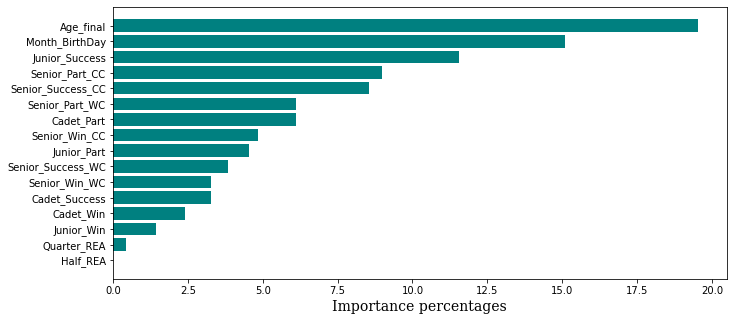

In [43]:
feature_importances = (best_lgbm.feature_importances_ / sum(best_lgbm.feature_importances_)) * 100
results = pd.DataFrame({'Features': ['Age_final', 'Month_BirthDay', 'Quarter_REA', 'Half_REA',
                               'Cadet_Win', 'Cadet_Success', 'Cadet_Part', 'Junior_Win',
                                'Junior_Success', 'Junior_Part', 'Senior_Win_CC',
                                'Senior_Success_CC', 'Senior_Part_CC', 'Senior_Win_WC',
                                   'Senior_Success_WC', 'Senior_Part_WC'],
                        'Importances': feature_importances}).sort_values(by = "Importances", ascending=True)
plt.figure(figsize = (11,5))

font1 = {'family':'serif','color':'black','size':14}
ax = plt.barh(results['Features'], results['Importances'], color ='teal')
plt.xlabel('Importance percentages', fontdict = font1)

plt.savefig('11_importance_percentage_m.png')

plt.show()